# Project Number 02  |  Data Cleaning and Exploratory Data Analysis (EDA) on a Dataset

Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

* Sample dataset :  https://www.kaggle.com/c/titanic/data
* Project done by : Younas Khan

#### Importing necessary libraries


In [ ]:
import warnings
warnings.filterwarnings('ignore')

***import warnings**: This imports the warnings module, which is used to control the display of warning messages.
**warnings.filterwarnings('ignore')**: This line suppresses all warnings. This is useful to keep the output clean, especially when warnings are not relevant to the analysis.*

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

***import numpy as np**: Imports the NumPy library and allows us to use it via the alias np. NumPy is used for numerical operations on arrays.
**import pandas as pd**: Imports the pandas library and allows us to use it via the alias pd. Pandas is used for data manipulation and analysis.
**import matplotlib.pyplot as plt**: Imports the pyplot module from the matplotlib library, used for creating static, animated, and interactive visualizations in Python.
**import seaborn as sns**: Imports the Seaborn library, which is based on matplotlib and provides a high-level interface for drawing attractive statistical graphics.**

In [15]:
sns.set_theme(context='notebook', style='whitegrid', palette='muted')

***sns.set_theme**(...): Sets the theme for all Seaborn plots. The **context** parameter is set to 'notebook' for appropriate scaling of elements for notebooks, **style** is set to 'whitegrid' for a clean white background with gridlines, and **palette** is set to 'muted' for soft, muted colors.*

#### Reading the Dataset

In [16]:
df = pd.read_csv('Titanic.csv', index_col='PassengerId')

**Reads the CSV file named **'Titanic.csv'** into a pandas DataFrame, setting **'PassengerId'** as the index column.*

#### Understanding the Shape of the Data

In [18]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


*Displays the first 5 rows of the DataFrame. This gives a quick overview of the data and its structure.*

#### Checking Data Types and Missing Values

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


*Provides a concise summary of the DataFrame, including the number of non-null entries and the data type of each column. This helps in understanding the data types and identifying any missing values.*

#### Summary Statistics


In [20]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


*Generates descriptive statistics that summarize the central tendency, dispersion, and shape of the data’s distribution, excluding NaN values.*

#### Checking Missing Values

In [21]:
df.drop(columns='Cabin').isna().mean()

Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000000
Embarked    0.002245
dtype: float64

*Drops the 'Cabin' column and then calculates the mean of missing values for each column, giving the proportion of missing values per column.*

#### Data Cleaning

In [22]:
df = df.drop(columns='Cabin').dropna(subset=['Embarked'])
df['Age'] = df['Age'].round()
df['Pclass'] = df['Pclass'].map({1: 'Upper', 2: 'Middle', 3: 'Lower'})
df['Embarked'] = df['Embarked'].map({1: 'Upper', 2: 'Middle', 3: 'Lower'})
df['Survived'] = df['Survived'].map({0: 'Survived', 1: 'Not Survived'})
df['Sex'] = df['Sex'].str.title()

*Drops the **'Cabin'** column and then drops rows where **'Embarked'** has missing values.*
*Rounds the **'Age'** column values to the nearest integer.*
*Maps the integer values in **'Pclass'** to string labels **'Upper', 'Middle', and 'Lower'.***
*Maps the integer values in **'Survived'** to string labels **'Survived'** and **'Not Survived'.***
*Capitalizes the first letter of each string in the **'Sex' column.***


#### Converting Columns to Categorical


In [23]:
categorical_columns = ['Sex', 'Parch', 'SibSp', 'Pclass', 'Embarked', 'Survived']
df[categorical_columns] = df[categorical_columns].astype('category')

*Converts the specified columns to the 'category' data type for better memory efficiency and performance.*

#### Reordering Columns

In [24]:
cols = [
    'Name', 'Sex', 'Age', 'Parch', 'SibSp',
    'Ticket', 'Pclass', 'Embarked', 'Fare',
    'Survived'
]
df = df[cols]

***cols =[...colounms..]:** Defines the desired order of columns.*

***df = df[cols]:** Reorders the DataFrame columns according to the specified order.*

In [25]:
df.head()

,Name,Sex,Age,Parch,SibSp,Ticket,Pclass,Embarked,Fare,Survived
PassengerId,,,,,,,,,,
1,"Braund, Mr. Owen Harris",Male,22.0,0,1,A/5 21171,Lower,NaN,7.2500,Survived
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.0,0,1,PC 17599,Upper,NaN,71.2833,Not Survived
3,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,Lower,NaN,7.9250,Not Survived
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35.0,0,1,113803,Upper,NaN,53.1000,Not Survived
5,"Allen, Mr. William Henry",Male,35.0,0,0,373450,Lower,NaN,8.0500,Survived


*Displays the first 5 rows of the modified DataFrame to verify changes.*

#### Checking DataFrame Information Again

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Name      889 non-null    object  
 1   Sex       889 non-null    category
 2   Age       712 non-null    float64 
 3   Parch     889 non-null    category
 4   SibSp     889 non-null    category
 5   Ticket    889 non-null    object  
 6   Pclass    889 non-null    category
 7   Embarked  0 non-null      category
 8   Fare      889 non-null    float64 
 9   Survived  889 non-null    category
dtypes: category(6), float64(2), object(2)
memory usage: 41.1+ KB


*Provides a concise summary of the DataFrame after data cleaning, showing updated non-null counts and data types.*

#### Data Exploration

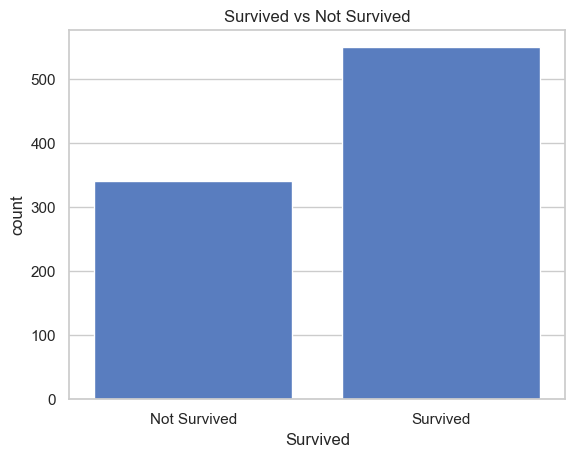

In [27]:
sns.countplot(data=df, x='Survived')
plt.title('Survived vs Not Survived')
plt.show()

***sns.countplot(data=df, x='Survived'):** Creates a count plot for the 'Survived' column.*

***plt.title('Survived vs Not Survived'):** Sets the title for the plot.*

#### Distribution of Age and Fare

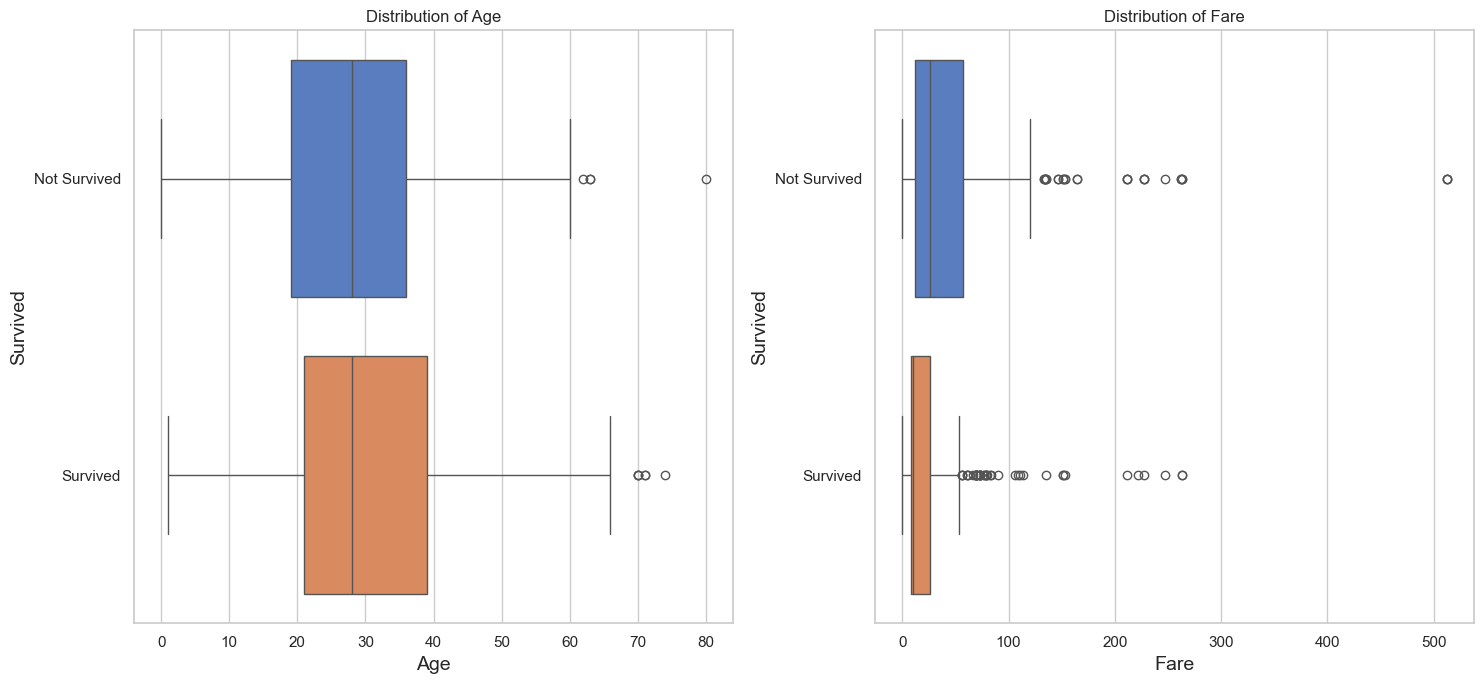

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

sns.boxplot(data=df, x='Age', y='Survived', ax=ax1, palette='muted')
ax1.set_xlabel('Age', fontsize=14)
ax1.set_ylabel('Survived', fontsize=14)
ax1.set_title('Distribution of Age')

sns.boxplot(data=df, x='Fare', y='Survived', ax=ax2, palette='muted')
ax2.set_xlabel('Fare', fontsize=14)
ax2.set_ylabel('Survived', fontsize=14)
ax2.set_title('Distribution of Fare')

plt.tight_layout()
plt.show()

**fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7)):** Creates a figure with two subplots side by side.
**sns.boxplot(data=df, x='Age', y='Survived', ax=ax1, palette='muted'):** Creates a box plot of 'Age' vs 'Survived' on the first subplot.
**ax1.set_xlabel('Age', fontsize=14):** Sets the x-axis label for the first subplot.
**ax1.set_ylabel('Survived', fontsize=14):** Sets the y-axis label for the first subplot.
**ax1.set_title('Distribution of Age'):** Sets the title for the first subplot.
**sns.boxplot(data=df, x='Fare', y='Survived', ax=ax2, palette='muted'):** Creates a box plot of 'Fare' vs 'Survived' on the second subplot.
**ax2.set_xlabel('Fare', fontsize=14)**: Sets the x-axis label for the second subplot.
**ax2.set_ylabel('Survived', fontsize=14):** Sets the y-axis label for the second subplot.
**ax2.set_title('Distribution of Fare'):** Sets the title for the second subplot.
**plt.tight_layout():** Adjusts the layout to prevent overlap.*

#### Pairplot

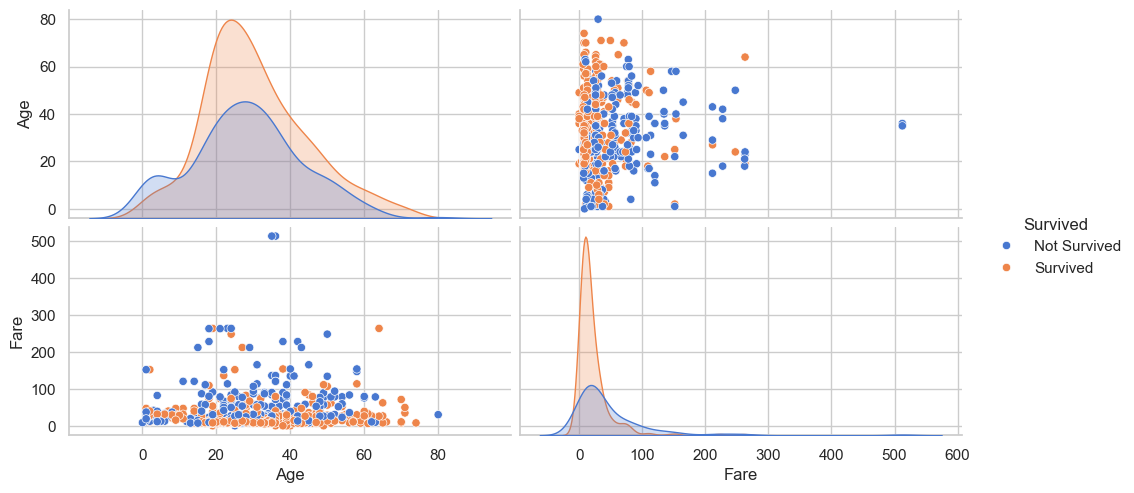

In [32]:
sns.pairplot(data=df, hue='Survived', aspect=2)

**sns.pairplot(data=df, hue='Survived', aspect=2):** Creates a pair plot to show the relationships between all numerical features in the DataFrame, with points colored by 'Survived'.*

#### Categorical Feature Analysis

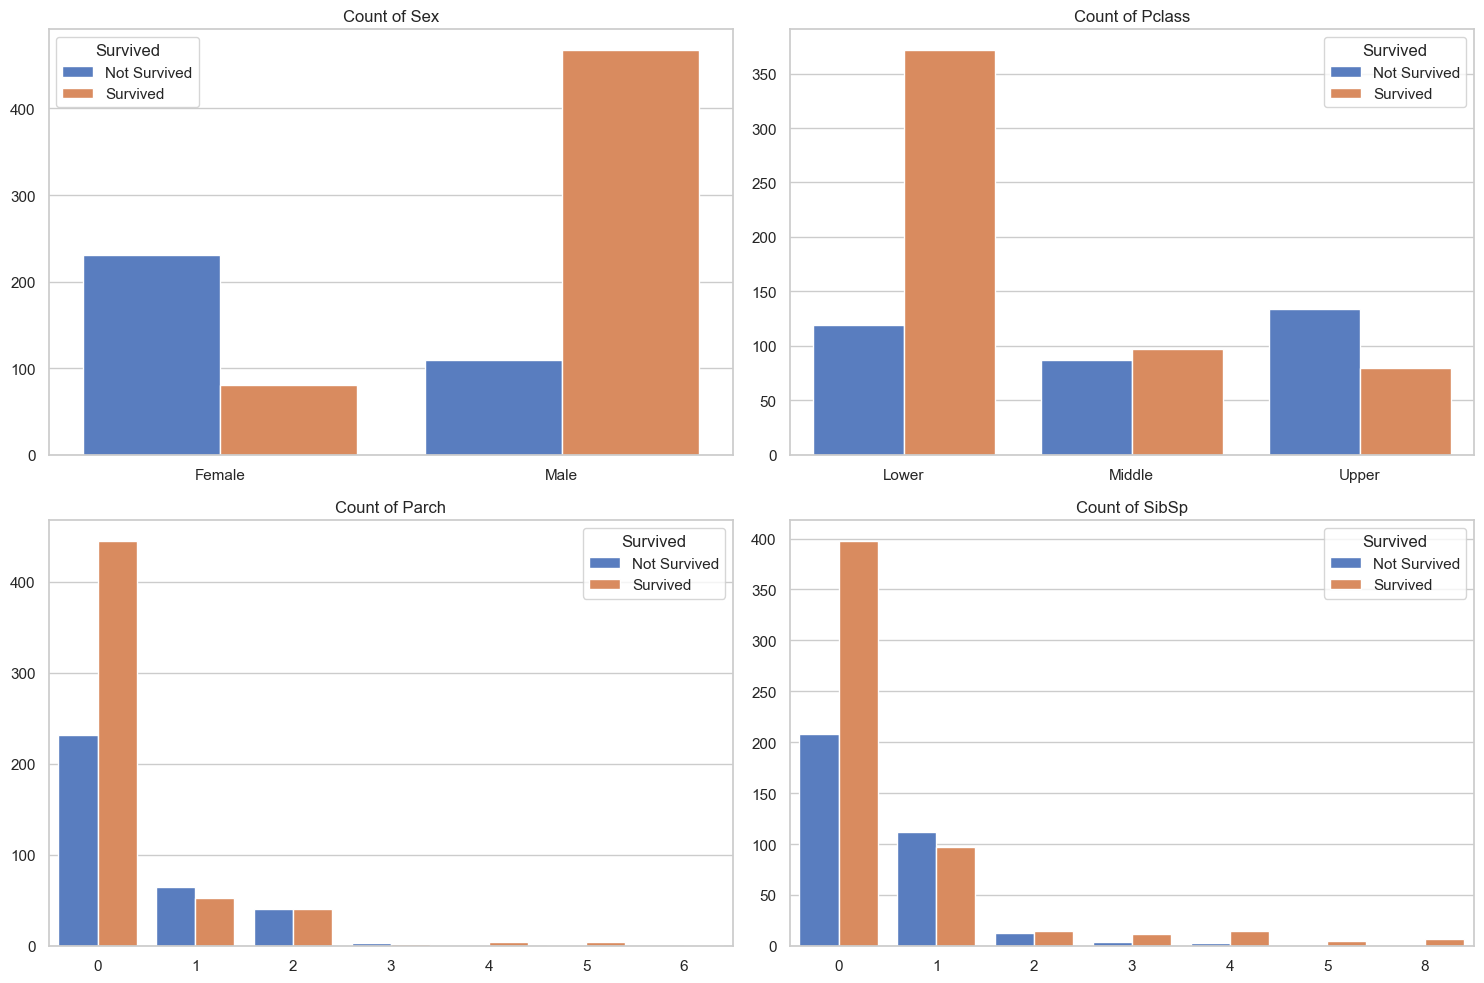

In [33]:
cat_cols = ['Sex', 'Pclass', 'Parch', 'SibSp']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for feature, ax in zip(cat_cols, axes.flatten()):
    sns.countplot(data=df, x=feature, hue='Survived', ax=ax)
    ax.set_title(f'Count of {feature}')
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

**cat_cols = ['Sex', 'Pclass', 'Parch', 'SibSp']:** Defines a list of categorical columns to analyze.
**fig, axes = plt.subplots(2, 2, figsize=(15, 10)):** Creates a figure with a 2x2 grid of subplots.
**for feature, ax in zip(cat_cols, axes.flatten()):** Iterates over the categorical columns and corresponding subplots.
**sns.countplot(data=df, x=feature, hue='Survived', ax=ax):** Creates a count plot for each feature, with bars colored by 'Survived'.
**ax.set_title(f'Count of {feature}'):** Sets the title for each subplot.
**ax.set_xlabel(''):** Sets an empty x-axis label for each subplot.
**ax.set_ylabel(''):** Sets an empty y-axis label for each subplot.
**plt.tight_layout():** Adjusts the layout to prevent overlap.*